In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [51]:
# Load datasets
train_data = pd.read_csv('loan-train.csv')
test_data = pd.read_csv('loan-test.csv')

In [52]:
# Combine train and test data for preprocessing
combined_data = pd.concat([train_data.drop('Loan_Status', axis=1), test_data], axis=0)

In [54]:
# Replace this line
combined_data.fillna(combined_data.mean(), inplace=True)

# With this line
combined_data.fillna(combined_data.select_dtypes(include=np.number).mean(), inplace=True)


C:\Users\ds124\AppData\Local\Temp\ipykernel_11316\3531000573.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combined_data.fillna(combined_data.mean(), inplace=True)


In [40]:
# Feature Engineering
combined_data['TotalIncome'] = combined_data['ApplicantIncome'] + combined_data['CoapplicantIncome']

In [41]:
# Encoding categorical variables
label_encoders = {}
for col in combined_data.select_dtypes(include='object').columns:
    label_encoders[col] = LabelEncoder()
    combined_data[col] = label_encoders[col].fit_transform(combined_data[col])

In [42]:
# Splitting back into train and test data
train_processed = combined_data[:len(train_data)]
test_processed = combined_data[len(train_data):]

In [43]:
# Ensure Loan_Status is encoded properly
train_data['Loan_Status'] = train_data['Loan_Status'].map({'N': 0, 'Y': 1})

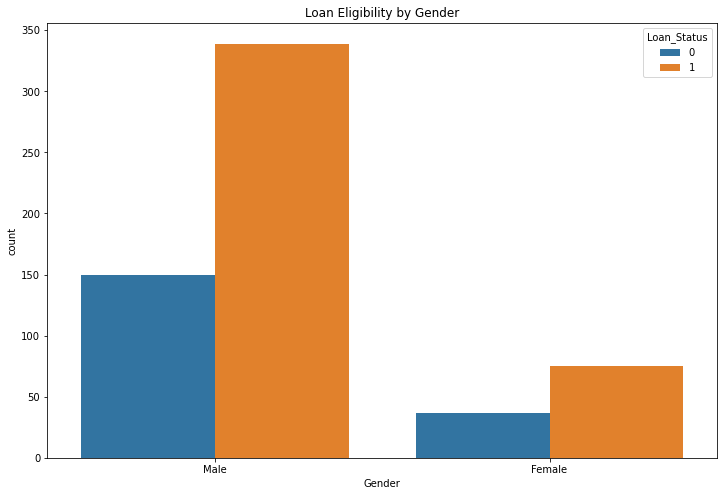

In [44]:
# EDA
plt.figure(figsize=(12, 8))
sns.countplot(x='Gender', hue='Loan_Status', data=train_data)
plt.title('Loan Eligibility by Gender')
plt.show()

# Similar EDA for other features

In [45]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(train_processed, train_data['Loan_Status'], test_size=0.2, random_state=42)

In [46]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increase max_iter
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

In [47]:
# Model Training and Evaluation
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}
    

In [48]:
# Display Results
results_df = pd.DataFrame(results).T
print(results_df)

                        Accuracy  Precision  Recall  F1 Score   ROC AUC
Logistic Regression     0.788618   0.759615  0.9875  0.858696  0.703052
Random Forest           0.764228   0.757576  0.9375  0.837989  0.689680
Support Vector Machine  0.650407   0.650407  1.0000  0.788177  0.500000
Decision Tree           0.650407   0.734177  0.7250  0.729560  0.618314


Text(0.5, 1.0, 'Loan Eligibility by Gender')

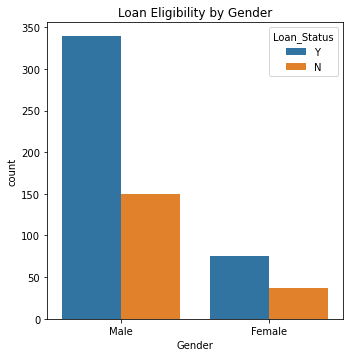

In [55]:
# EDA
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.countplot(x='Gender', hue='Loan_Status', data=train_data)
plt.title('Loan Eligibility by Gender')

Text(0.5, 1.0, 'Loan Eligibility by Marital Status')

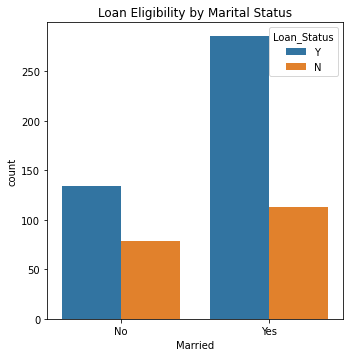

In [63]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 2)
sns.countplot(x='Married', hue='Loan_Status', data=train_data)
plt.title('Loan Eligibility by Marital Status')

Text(0.5, 1.0, 'Loan Eligibility by Dependents')

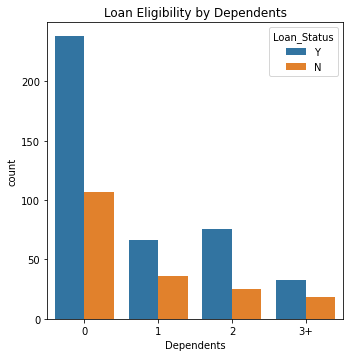

In [64]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 3)
sns.countplot(x='Dependents', hue='Loan_Status', data=train_data)
plt.title('Loan Eligibility by Dependents')

Text(0.5, 1.0, 'Loan Eligibility by Education')

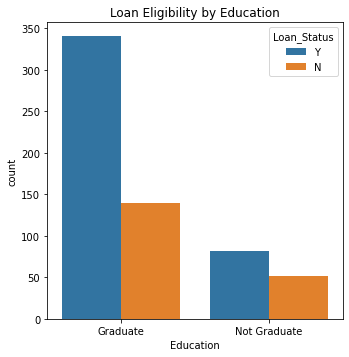

In [65]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 4)
sns.countplot(x='Education', hue='Loan_Status', data=train_data)
plt.title('Loan Eligibility by Education')

Text(0.5, 1.0, 'Loan Eligibility by Self Employment')

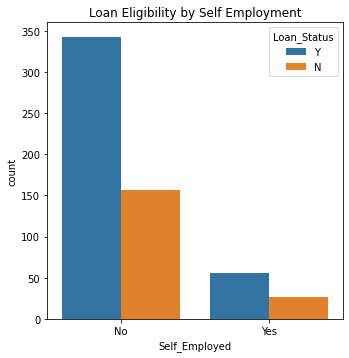

In [66]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 5)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=train_data)
plt.title('Loan Eligibility by Self Employment')

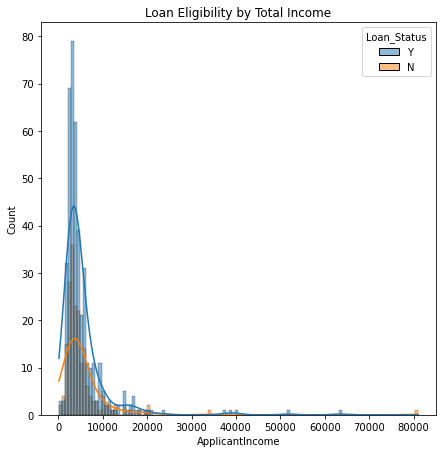

In [67]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 6)
sns.histplot(x='ApplicantIncome', hue='Loan_Status', data=train_data, kde=True)
plt.title('Loan Eligibility by Total Income')

plt.tight_layout()
plt.show()